Deoxyfluorination with Sulfonyl Fluorides Published in JACS https://doi.org/10.1021/jacs.8b01523

Yield Prediction using Random Forest & XGBoost
                                                                                      Gashaw M. Goshu
                                                                                      June, 2020

In [1]:
# import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
data = pd.read_csv(r"C:\Users\Gashaw\Documents\R_input\descriptor_table.csv")
 


Bad key "text.kerning_factor" on line 4 in
C:\Users\Gashaw\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\Gashaw\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data

,alcohol_*C1_electrostatic_charge,alcohol_*C1_exposed_area,alcohol_electronegativity,alcohol_primary,alcohol_secondary,alcohol_tertiary,alcohol_cyclic,alcohol_4-membered_ring,alcohol_5-membered_ring,alcohol_6-membered_ring,...,alcohol_homoallylic,alcohol_alpha-carbonyl,alcohol_beta_carbonyl,alcohol_hemiacetal,alcohol_alpha amino,base_*N1_exposed_area,sulfonyl_fluoride_*S1_electrostatic_charge,sulfonyl_fluoride_*F1_electrostatic_charge,sulfonyl_fluoride_*O1_electrostatic_charge,yield
0,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.973,-0.210,-0.439,42
1,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.849,-0.198,-0.401,48
2,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.978,-0.208,-0.436,47
3,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.973,-0.204,-0.430,52
4,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,7.397,0.926,-0.162,-0.384,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.973,-0.210,-0.439,14
636,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.849,-0.198,-0.401,23
637,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.978,-0.208,-0.436,36
638,0.200,8.443,0.10,0,1,0,1,0,0,1,...,0,0,0,1,0,5.305,0.973,-0.204,-0.430,44


In [3]:
# Only six descriptors or features selected
features = ['alcohol_*C1_exposed_area','alcohol_*C1_electrostatic_charge',
            'sulfonyl_fluoride_*F1_electrostatic_charge','base_*N1_exposed_area',
           'alcohol_electronegativity','sulfonyl_fluoride_*S1_electrostatic_charge',
            'sulfonyl_fluoride_*O1_electrostatic_charge']
X_non_calculated = data.drop(features, axis=1)
X_categorical_features = X_non_calculated.drop(['yield'], axis =1)
y_yield = data['yield']
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [4]:
X_categorical_features

,alcohol_primary,alcohol_secondary,alcohol_tertiary,alcohol_cyclic,alcohol_4-membered_ring,alcohol_5-membered_ring,alcohol_6-membered_ring,alcohol_7-membered_ring,alcohol_benzylic,alcohol_allylic,alcohol_homobenzylic,alcohol_homoallylic,alcohol_alpha-carbonyl,alcohol_beta_carbonyl,alcohol_hemiacetal,alcohol_alpha amino
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
636,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
637,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
638,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0


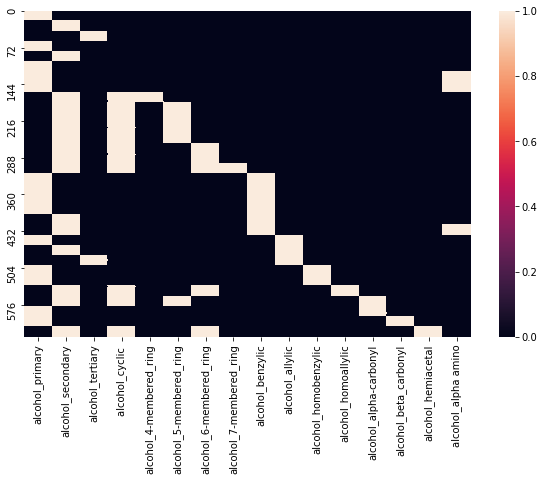

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
sn.heatmap(data=X_categorical_features, yticklabels=72)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_categorical_features, y_yield, test_size = 0.3)

In [7]:
# Data preprocessing
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', rf)])


In [8]:
# Model Training and prediction
pipe.fit(X_train,y_train)
preds = pipe.predict(X_valid)

In [9]:
# Model accuracy using mean absolute error
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 16.07762625234345


In [10]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, preds)) 
print('rmse:', rmse)

rmse: 21.741409567057875


In [11]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, preds)
print('R^2:', R2)

R^2: 0.41700356309282294


Text(0.5, 1.0, 'Observed vs predicted yield of test set using Random Forest')

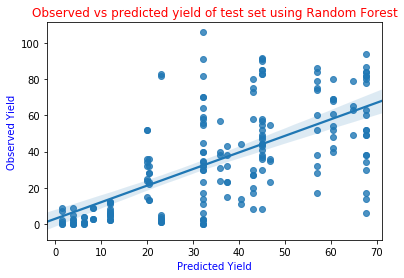

In [12]:
sn.regplot(x=preds, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Observed vs predicted yield of test set using Random Forest", color='red')

In [13]:
# Feature importance using Random Forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.0702 ± 0.0942,alcohol_6-membered_ring
0 ± 0.0000,alcohol_alpha amino
0 ± 0.0000,alcohol_hemiacetal
0 ± 0.0000,alcohol_beta_carbonyl
0 ± 0.0000,alcohol_alpha-carbonyl
0 ± 0.0000,alcohol_homoallylic
0 ± 0.0000,alcohol_homobenzylic
0 ± 0.0000,alcohol_allylic
0 ± 0.0000,alcohol_7-membered_ring
0 ± 0.0000,alcohol_4-membered_ring


In [14]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(random_state=42)

In [15]:
# Data processing
pipe2 = Pipeline([
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb_reg)])

In [16]:
pipe2.fit(X_train,y_train)
y_predicted2 = pipe2.predict(X_valid)

In [17]:
# Model accuracy using mean absolute error
score = mean_absolute_error(y_valid, y_predicted2)
print('MAE:', score)

MAE: 16.042971845716238


In [18]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, y_predicted2))  
print('rmse2:', rmse2)

rmse2: 21.759988537616255


In [19]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, y_predicted2)
print('R^2:', R2)

R^2: 0.41600674625040035


Text(0.5, 1.0, 'Observed vs predicted yield of test set using Random Forest')

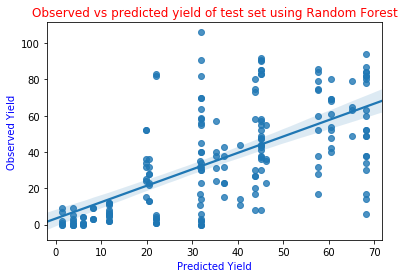

In [20]:
sn.regplot(x=y_predicted2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Observed vs predicted yield of test set using Random Forest", color='red')